In [1]:
import os
import sys
import glob
import pylab as pl
import numpy as np
import matplotlib.pyplot as plt
import astropy.io.fits as fits
import matplotlib.pyplot as plt
import numpy as np

from   mpl_toolkits.axes_grid1 import make_axes_locatable
from   astropy.table           import Table, vstack

In [2]:
os.environ['CODE_ROOT'] = os.environ['HOME'] + '/DESI/'

sys.path.append(os.environ['CODE_ROOT'])

In [3]:
from   gama_limits import gama_field
from   delta8_limits import delta8_tier

In [4]:
field = 'G9'

In [5]:
gama_d8 = Table.read(os.environ['HOME'] + '/data/GAMA4/gama_gold_ddp_n8.fits')
gama_d8

CATAID,OBJID,RA,DEC,R_PETRO,ZGAMA,NQ,SPECID,SURVEY_CLASS,UMAG_DRED_SDSS,GMAG_DRED_SDSS,RMAG_DRED_SDSS,IMAG_DRED_SDSS,ZMAG_DRED_SDSS,LUMDIST,DISTMOD,FIELD,CARTESIAN_X,CARTESIAN_Y,CARTESIAN_Z,GMR,REST_GMR_0P1,REST_GMR_0P1_WARN,REST_GMR_0P1_INDEX,KCORR_R0P1,KCORR_G0P1,KCORR_R0P0,KCORR_G0P0,REST_GMR_0P0,Q_COLOR_0P0,EQ_ALL_0P0,EQ_COLOR_0P0,MALL_0P0,MCOLOR_0P0,Z_THETA_QALL,Z_THETA_QCOLOR,DELTA_RPETRO_FAINT,ZMAX,ZMAX_WARN,DELTA_RPETRO_BRIGHT,ZMIN,ZMIN_WARN,DDP [3],RANDSEP,RANDMATCH,BOUND_DIST,FILLFACTOR,DDP1_N8,DDP2_N8,DDP3_N8,DDP1_DELTA8,DDP2_DELTA8,DDP3_DELTA8
,,deg,deg,mag,,,,,mag,mag,mag,mag,mag,Mpc,,,,,,mag,,,,,,,,mag,mag,,,mag,mag,,,mag,,,mag,,,,,,,,,,,,,
int32,int64,float64,float64,float32,float32,int16,bytes33,int16,float32,float32,float32,float32,float32,float64,float64,bytes4,float64,float64,float64,float32,float64,int32,int64,float64,float64,float64,float64,float64,float64,float32,float32,float64,float64,float64,float64,float32,float64,float64,float32,float64,float64,int64,float64,int64,float64,float64,int64,int64,int64,float64,float64,float64
218760,587725076066468464,140.76184403,0.88138861,19.285234,0.19148,4,G09_Y2_016_317,6,20.92196,19.863764,19.221165,18.91657,18.758524,658.2304679092451,39.09188990436649,G9,-427.8330938224349,349.4068458150677,8.49804217431823,0.6425991,0.48144473504871893,0,3,-0.08253885963365701,0.07861551115258505,0.11357102748632342,0.3017968172070399,0.4543733161142445,2.12,-0.1857356,-0.40593758,-19.734490882352347,-19.514288898304457,39.01972533364629,38.7995233495984,0.5147648,0.2469454249819889,0.0,-7.2852345,0.006675859535403247,0.0,0 .. 0,0.8633861005657407,1060096,2.332156921409896,0.8001266084346458,3,0,0,-0.6752591517062054,-1.0,-1.0
514222,588010357995208988,140.43170714,2.70322146,18.915146,0.14678,4,G09_Y2_042_287,6,21.589085,19.783735,18.913113,18.392132,18.141521,490.20543377838897,38.45189060482602,G9,-329.1495629694051,271.98953125357735,20.16024784947387,0.87062263,0.7728269220198738,0,5,-0.05485153795869698,0.04294417490912461,0.17349867310879555,0.3710348496743173,0.6730864583221735,0.8,-0.1423766,-0.117424004,-19.567866802215363,-19.59281940013149,38.4830126762388,38.50796527415493,0.88485336,0.21070684751247823,0.0,-6.915146,0.0068939973687066405,0.0,0 .. 0,0.7755911534170589,988113,2.551916182498647,0.6443910098232404,32,44,0,3.301053898096683,2.2068695538248937,-1.0
136729,587724650329014562,175.98187034,-1.68652677,17.821947,0.10723,4,G12_Y1_BS1_111,6,20.750114,18.915552,17.888975,17.370033,16.957827,348.57500517451376,37.7114812124361,G12,-313.90729155002373,22.05035129652807,-9.26544554551312,1.026577,1.0076820215507178,0,6,-0.09325731567799292,-0.07436234137910137,0.14132080272041764,0.324264347557832,0.843633451012195,0.8,-0.1040131,-0.085784,-19.92684181711174,-19.945070914239654,37.748788914890056,37.76701801201797,1.9780521,0.2359721751024416,0.0,-5.821947,0.008105257160076889,0.0,0 .. 0,0.9266863844469445,802001,7.514641469346167,1.0062198257587212,101,137,0,7.69366463745556,5.394488163534022,-1.0
8301,588848900987158689,181.68685894,0.7011761,17.671268,0.09026,4,G12_Y6_061_170,6,20.462242,18.581089,17.676947,17.264162,16.943651,289.90010408167615,37.31124185639019,G12,-265.7648322504193,-7.826708372577856,3.253957772909903,0.9041424,0.9274551055428526,0,6,-0.11610680033790788,-0.13941952612018324,0.11045695863690697,0.24497721963462613,0.769622118763023,0.8,-0.087552205,-0.072208,-19.662878147164204,-19.678222349682667,37.33414661029897,37.349490812817436,2.1287308,0.21495387626607787,0.0,-5.6712685,0.007175381374489338,0.0,0 .. 0,0.7301713796613791,234092,6.392815839637295,0.9138975247854928,8,14,23,-0.24182952969775307,-0.2805367332165579,-0.36211267127699487
660000,587729150915772570,140.29266091,-1.49659397,18.37324,0.19381,4,G09_Y4_215_048,6,20.901785,19.268467,18.358198,18.044136,17.891954,667.2133985674924,39.12132379475438,G9,-429.8204948973231,356.9368642006288,-14.596929953902679,0.9102688,0.7098572373522847,0,5,-0.02343535675875605,0.17697618945829519

In [6]:
gama_d8['ZGAMA'].min(), gama_d8['ZGAMA'].max()

(0.03903, 0.26299)

In [7]:
np.unique(gama_d8['FIELD'].data)

array([b'G12', b'G15', b'G9'], dtype='|S4')

In [8]:
gama_d8 = gama_d8[gama_d8['FIELD'] == field]

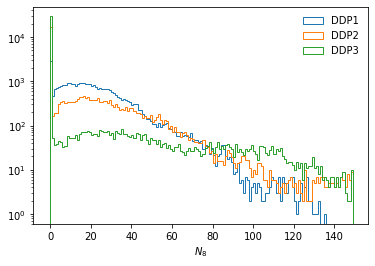

In [9]:
bins=np.arange(-1., 150., 1.)

_ = pl.hist(gama_d8['DDP1_N8'], histtype='step', bins=bins, label='DDP1')
_ = pl.hist(gama_d8['DDP2_N8'], histtype='step', bins=bins, label='DDP2')
_ = pl.hist(gama_d8['DDP3_N8'], histtype='step', bins=bins, label='DDP3')

pl.xlabel(r'$N_8$')
pl.yscale('log')
pl.legend(frameon=False)

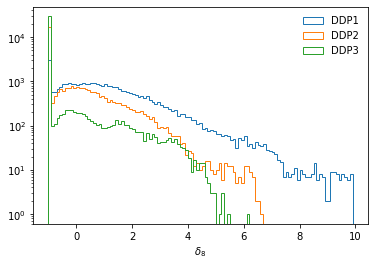

In [10]:
bins=np.arange(-1., 10., 0.1)

_ = pl.hist(gama_d8['DDP1_DELTA8'], histtype='step', bins=bins, label='DDP1')
_ = pl.hist(gama_d8['DDP2_DELTA8'], histtype='step', bins=bins, label='DDP2')
_ = pl.hist(gama_d8['DDP3_DELTA8'], histtype='step', bins=bins, label='DDP3')

pl.xlabel(r'$\delta_8$')
pl.yscale('log')
pl.legend(frameon=False)

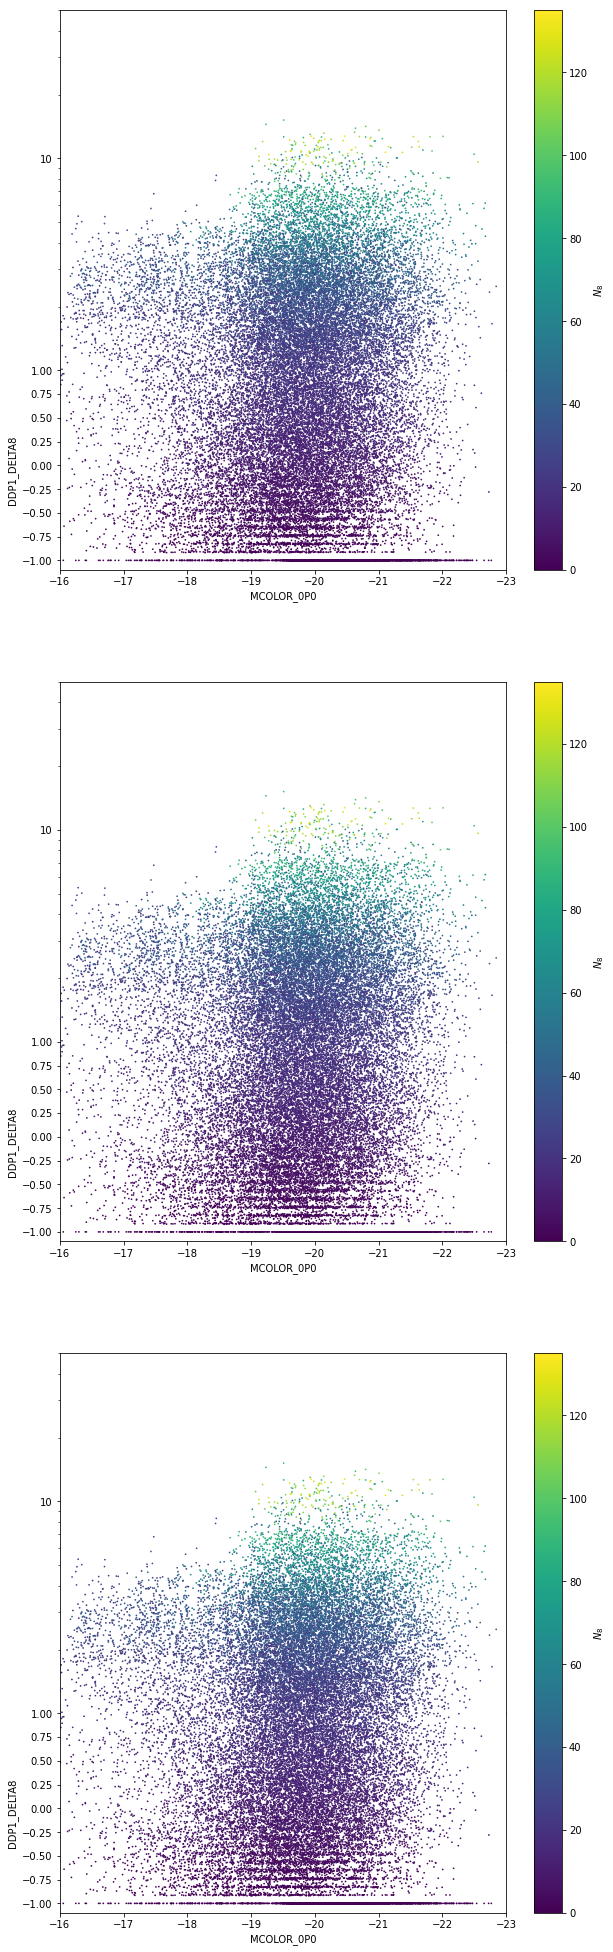

In [11]:
fig, axes = plt.subplots(3, 1, figsize=(10, 35))

for idx, ax in enumerate(axes):
    sc = ax.scatter(gama_d8['MCOLOR_0P0'],\
                    gama_d8['DDP1_DELTA8'],\
                    c=gama_d8['DDP1_N8'],\
                    marker='.',\
                    lw=0.0,\
                    s=12)

    ax.set_xlabel('MCOLOR_0P0')
    ax.set_ylabel('DDP1_DELTA8')

    ax.set_xlim(-23., -16.)
    ax.set_ylim(-1.1, 1.)
    
    ax.spines['top'].set_visible(False)
    
    divider = make_axes_locatable(ax)
    
    axLog = divider.append_axes("top", size=5.0, pad=0, sharex=ax)
    axLog.set_yscale('log')
    axLog.set_xlim((-16., -23.))
    axLog.set_ylim((1., 50.))
    axLog.scatter(gama_d8['MCOLOR_0P0'], gama_d8['DDP1_DELTA8'], c=gama_d8['DDP1_N8'], marker='.', lw=0.0, s=12)

    axLog.spines['bottom'].set_visible(False)
    axLog.xaxis.set_ticks_position('top')
    axLog.xaxis.set_visible(False)

    axLog.set_yticks([10.])
    axLog.set_yticklabels(['10'])
    
    ax.set_title('DDP{}'.format(idx+1))

    colorbar = fig.colorbar(sc, ax=ax, label=r'$N_8$')

In [12]:
realz  = 0
rpaths = [os.environ['HOME'] + '/data/GAMA4/randoms/randoms_bd_ddp_n8_G{}_{:d}.fits'.format(ff, realz) for ff in [9, 12, 15]]

print('Reading: {}'.format(rpaths))

rand   = None

for rpath in rpaths:
    if not os.path.isfile(rpath):
        raise  RuntimeError('Expect random bound dist. file for {}; Run bound_dist.py for this field'.format(rpath))

    if rand == None:
        rand = Table.read(rpath)

    else:
        rand = vstack([rand, Table.read(rpath)])

Reading: ['/cosma/home/durham/dc-wils7/data/GAMA4/randoms/randoms_bd_ddp_n8_G9_0.fits', '/cosma/home/durham/dc-wils7/data/GAMA4/randoms/randoms_bd_ddp_n8_G12_0.fits', '/cosma/home/durham/dc-wils7/data/GAMA4/randoms/randoms_bd_ddp_n8_G15_0.fits']


/cosma/home/durham/dc-wils7/.local/lib/python3.9/site-packages/astropy/table/table.py:3488: FutureWarning: elementwise == comparison failed and returning scalar instead; this will raise an error or perform elementwise comparison in the future.
  result = self.as_array() == other


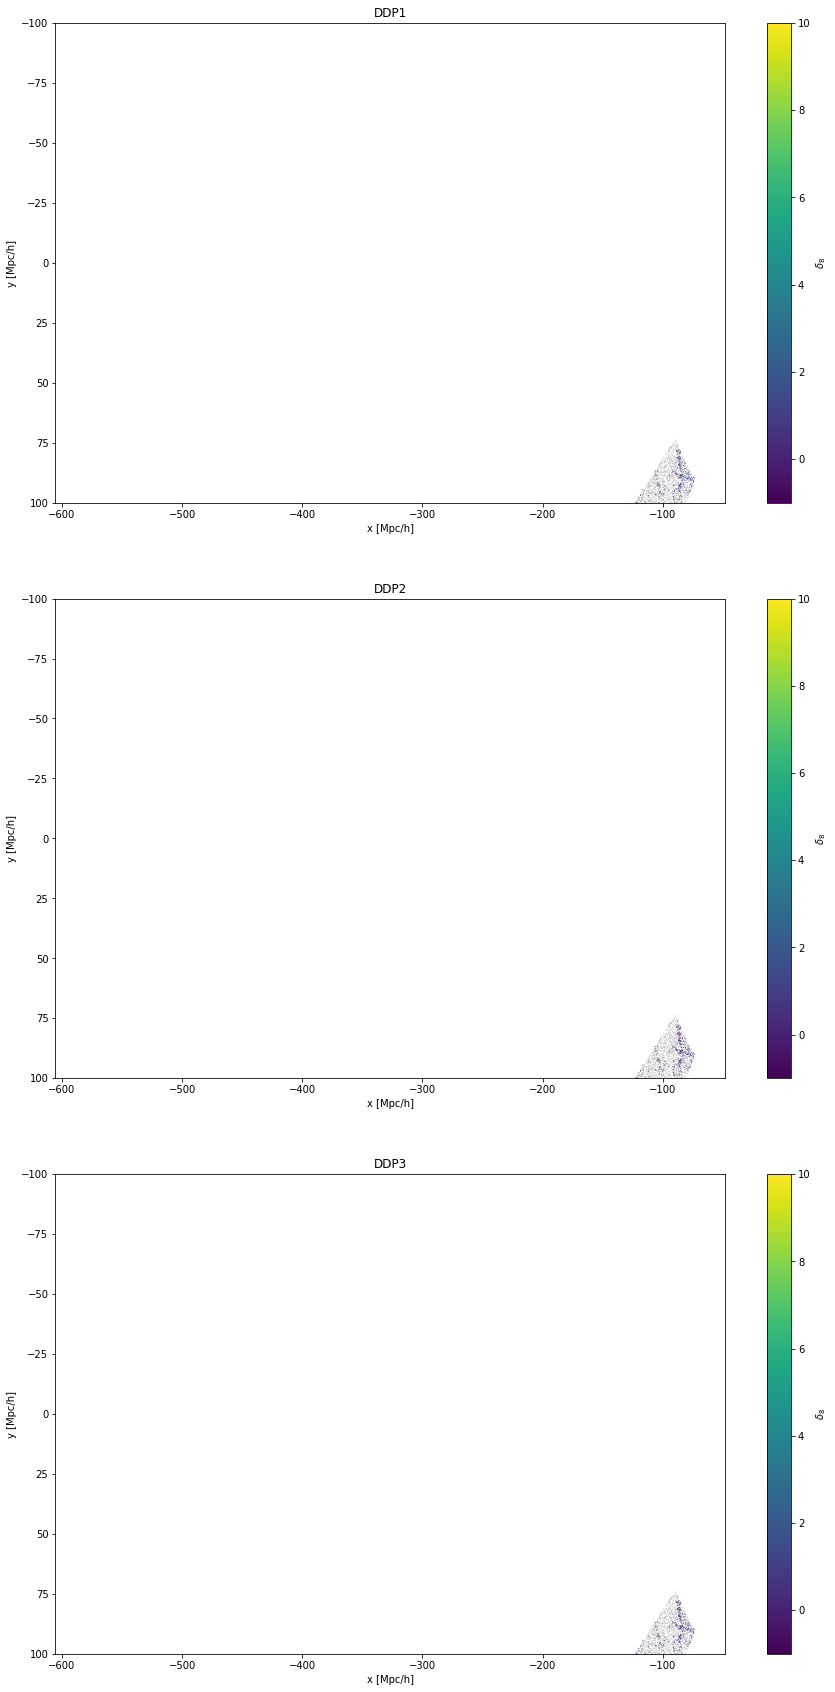

In [13]:
fig, axes = plt.subplots(3, 1, figsize=(15, 30))

rand_d8   = rand[rand['FIELD'] == field]

gama_d8_slice = gama_d8[np.abs(gama_d8['CARTESIAN_Z']) < 5.]
rand_d8_slice = rand_d8[np.abs(rand_d8['CARTESIAN_Z']) < 5.]

for idx in range(3):
    # rand_d8_slice['DDP{}_DELTA8'.format(idx+1)]
    
    sc = axes[idx].scatter(rand_d8_slice['CARTESIAN_X'],\
                           rand_d8_slice['CARTESIAN_Y'],\
                           c='k',\
                           alpha=0.05,\
                           marker='.',\
                           lw=0.0,\
                           s=3,\
                           vmin=-1.,\
                           vmax=10.)
    
    sc = axes[idx].scatter(gama_d8_slice['CARTESIAN_X'],\
                           gama_d8_slice['CARTESIAN_Y'],\
                           c=gama_d8_slice['DDP{}_DELTA8'.format(idx+1)],\
                           alpha=1.,\
                           marker='.',\
                           lw=0.0,\
                           s=3,\
                           vmin=-1.,\
                           vmax=10.)
    
    
    axes[idx].set_ylim(100., -100.)
    
    colorbar = fig.colorbar(sc, ax=axes[idx], label=r'$\delta_8$')    
    
    axes[idx].set_xlabel('x [Mpc/h]')
    axes[idx].set_ylabel('y [Mpc/h]')
    
    axes[idx].set_title('DDP{}'.format(idx+1))

In [14]:
rand['Z'].min(), rand['Z'].max()

(0.03900268, 0.26299992)

In [15]:
gama_d8.meta

OrderedDict([('EXTNAME', 'TilingCat'),
             ('TCOMM1', 'GAMA ID'),
             ('TUCD1', 'meta.id;meta.main'),
             ('TCOMM2', 'SDSS objid'),
             ('TUCD2', 'meta.id'),
             ('TCOMM3', 'J2000 coordinate'),
             ('TUCD3', 'pos.eq.ra'),
             ('TCOMM4', 'J2000 coordinate'),
             ('TUCD4', 'pos.eq.dec'),
             ('TCOMM5', '3-arcsec fiber magnitude'),
             ('TUCD5', 'phot.mag;em.opt.R'),
             ('TCOMM6', 'Extinction-corrected SDSS DR7 Petrosian mag'),
             ('TUCD6', 'phot.mag;em.opt.R'),
             ('TCOMM7', 'Extinction-corrected SDSS DR7 mag'),
             ('TUCD7', 'phot.mag;em.opt.U'),
             ('TCOMM8', 'Extinction-corrected SDSS DR7 mag'),
             ('TUCD8', 'phot.mag;em.opt.B'),
             ('TCOMM9', 'Extinction-corrected SDSS DR7 mag'),
             ('TUCD9', 'phot.mag;em.opt.R'),
             ('TCOMM10', 'Extinction-corrected SDSS DR7 mag'),
             ('TUCD10', 'phot.mag;em.opt.I

In [16]:
np.unique(rand['FIELD'], return_counts=True)

(<Column name='FIELD' dtype='bytes4' length=3>
 G12
 G15
  G9,
 array([1265955, 1265955, 1265955]))

In [17]:
tiers = delta8_tier(gama_d8['DDP1_DELTA8'])

In [18]:
np.unique(tiers, return_counts=True)

(array([-99,   0,   1,   2,   3]), array([17584,  3773,  3582,  7082,  2339]))

In [19]:
realz  = 0
rpaths = [os.environ['HOME'] + '/data/GAMA4/randoms/randoms_G{}_{:d}.fits'.format(ff, realz) for ff in [9, 12, 15]]

print('Reading: {}'.format(rpaths))

rand   = None

for rpath in rpaths:
    if not os.path.isfile(rpath):
        raise  RuntimeError('Expect random bound dist. file for {}; Run bound_dist.py for this field'.format(rpath))

    if rand == None:
        rand = Table.read(rpath)

    else:
        rand = vstack([rand, Table.read(rpath)])

Reading: ['/cosma/home/durham/dc-wils7/data/GAMA4/randoms/randoms_G9_0.fits', '/cosma/home/durham/dc-wils7/data/GAMA4/randoms/randoms_G12_0.fits', '/cosma/home/durham/dc-wils7/data/GAMA4/randoms/randoms_G15_0.fits']


G9


-580.43097 -73.76151


73.60615 -73.76151


-26.05787 -73.76151



G12


-747.16486 -115.565475


-78.02824 -115.565475


-39.08608 -115.565475

G15


-636.78845 -84.78161


-514.0881 -84.78161


-26.05787 -84.78161



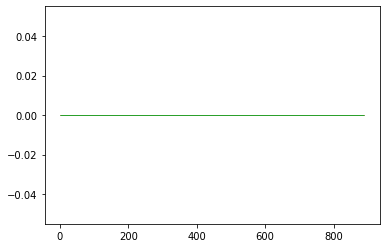

In [20]:
for field in ['G9', 'G12', 'G15']:
    in_field = rand[rand['FIELD'] == field]
    
    # pl.plot(rand['RANDOM_RA'], rand['RANDOM_DEC'], marker=',', lw=0.0)
    
    pl.hist(in_field['CARTESIAN_X'], histtype='step', bins=np.arange(0., 900., 10.))
        
    print(field)
    print(np.sort(in_field['CARTESIAN_X'].data).min(), np.sort(in_field['CARTESIAN_X']).max())
    print(np.sort(in_field['CARTESIAN_Y'].data).min(), np.sort(in_field['CARTESIAN_X']).max())
    print(np.sort(in_field['CARTESIAN_Z'].data).min(), np.sort(in_field['CARTESIAN_X']).max())
    print()

In [21]:
rand.dtype.names

('RANDOM_RA',
 'RANDOM_DEC',
 'Z',
 'V',
 'RANDID',
 'FIELD',
 'CARTESIAN_X',
 'CARTESIAN_Y',
 'CARTESIAN_Z',
 'IS_BOUNDARY')

# Done.